# Plot results


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

EXPERIMENT_FOR_MODEL = 5


gender_inference_random_forest = pd.read_csv('./sample/gender_inference_random-forest.csv', header=None)
gender_inference_random_forest.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

gender_inference_logistic_regression = pd.read_csv('./sample/gender_inference_logistic-regression.csv', header=None)
gender_inference_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)


### Gender inference

* observation

In [2]:
observation_gender_inference_random_forest = gender_inference_random_forest.iloc[0].to_frame().tail(5)
observation_gender_inference_random_forest.rename(columns={0: 'Random Forest'}, inplace=True)
observation_gender_inference_logistic_regression = gender_inference_logistic_regression.iloc[0].to_frame().tail(5)
observation_gender_inference_logistic_regression.rename(columns={0: 'Logistic Regression'}, inplace=True)

observation_gender_inference_random_forest_merged = pd.concat([observation_gender_inference_random_forest,
                                                              observation_gender_inference_logistic_regression], axis=1)

observation_gender_inference_random_forest_merged = observation_gender_inference_random_forest_merged

observation_gender_inference_random_forest_merged

,Random Forest,Logistic Regression
balanced acc,0.613158,0.645614
f1,0.597015,0.675676
precision,0.689655,0.694444
recall,0.526316,0.657895
accuracy,0.602941,0.647059


Text(0.5, 0, 'Dataset')

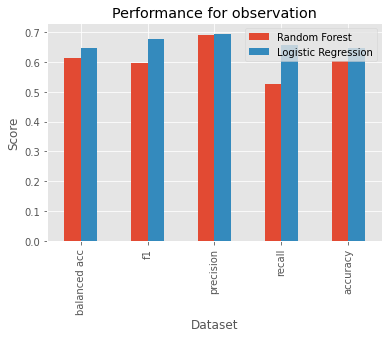

In [3]:
plt.style.use('ggplot')
observation_gender_inference_random_forest_merged.plot(kind='bar')
plt.title('Performance for observation')
plt.ylabel('Score')
plt.xlabel('Dataset')


##### For each recommendation model show performance at each step of the pipeline



* user KNN


In [4]:
current_experiment = 0
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
userKNN_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
userKNN_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
userKNN_model_performance_random_forest

,index,dataset,balanced acc,f1,precision,recall,accuracy
0,1,user-knn_embeddings,0.573593,0.567164,0.558824,0.575758,0.573529
1,2,user-knn_relevance,0.550000,0.550725,0.612903,0.500000,0.544118
2,3,user-knn_classification_best_10,0.484211,0.437500,0.538462,0.368421,0.470588
3,4,user-knn_classification_best_20,0.521053,0.433333,0.590909,0.342105,0.500000
4,5,user-knn_classification_best_50,0.550000,0.550725,0.612903,0.500000,0.544118


In [5]:
metrics = ['balanced acc', 'f1', 'precision', 'recall', 'accuracy']

def perform_plot(random_forest, logistic_regression, metric, model_name, kind='line'):
    plt.figure()
    plt.style.use('ggplot')
    if kind == 'bar':
        dff = pd.concat([random_forest[metric].to_frame(),logistic_regression[metric].to_frame()], axis=1)
        dff.plot(kind=kind)
    else:
        random_forest[metric].plot(kind=kind)
        logistic_regression[metric].plot(kind=kind)
    plt.title(metric + ' in ' + model_name + ' pipeline')
    indices = range(random_forest.shape[0])
    labels = random_forest['dataset'].to_list()
    plt.xticks(indices, labels, rotation=90)


* user KNN

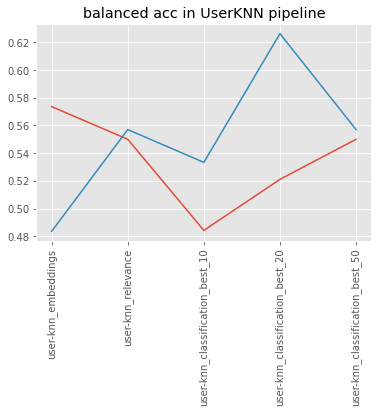

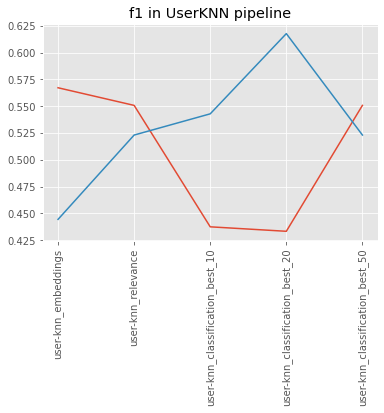

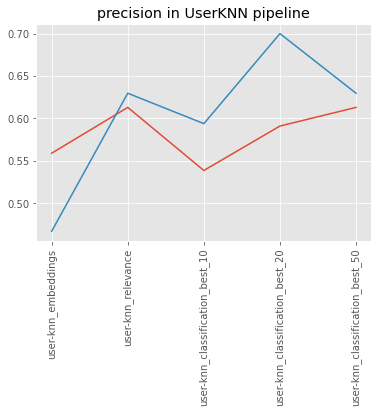

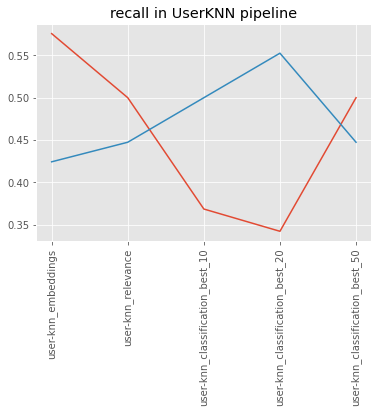

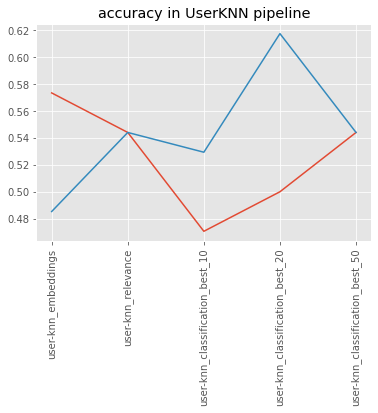

In [6]:
for m in metrics:
    perform_plot(userKNN_model_performance_random_forest, userKNN_model_performance_logistic_regression, m, 'UserKNN')

* item KNN

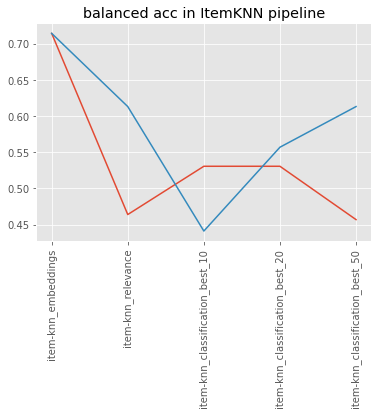

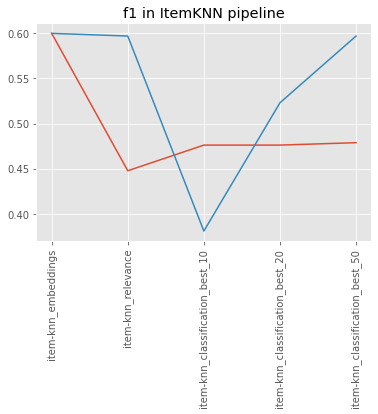

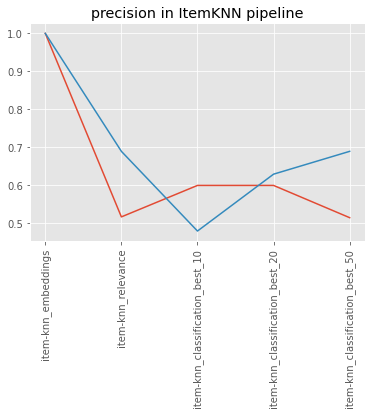

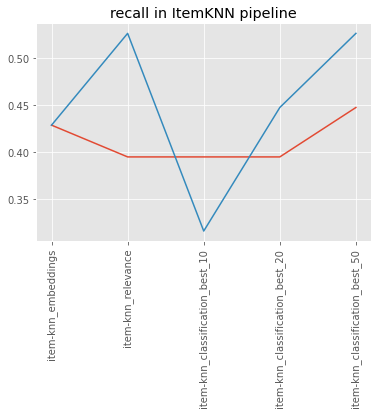

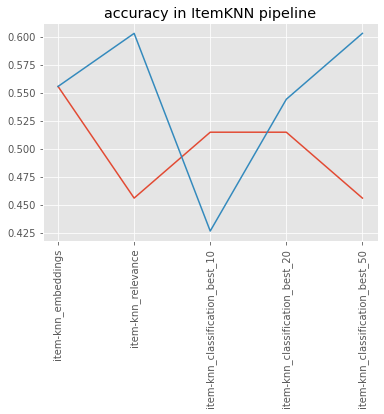

In [7]:
current_experiment = 1
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
itemKNN_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
itemKNN_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(itemKNN_model_performance_random_forest, itemKNN_model_performance_logistic_regression, m, 'ItemKNN')

* BPRMF


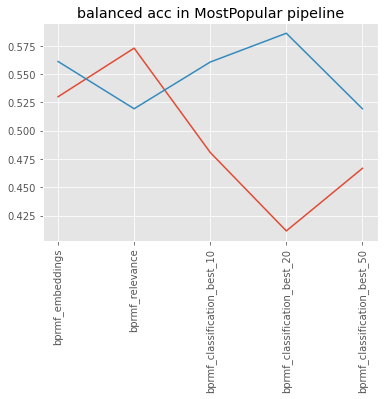

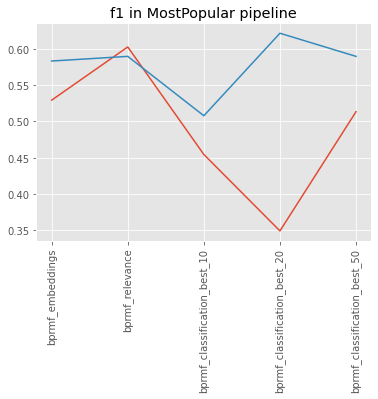

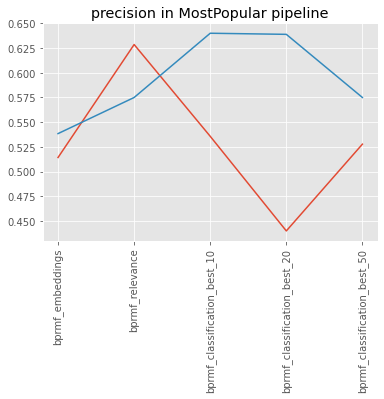

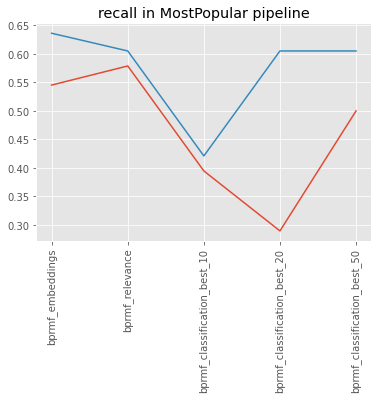

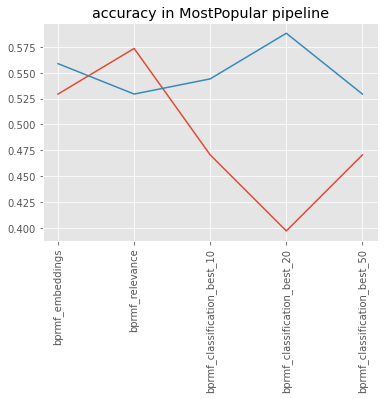

In [8]:
current_experiment = 3
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
bprmf_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
bprmf_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(bprmf_model_performance_random_forest, bprmf_model_performance_logistic_regression, m, 'MostPopular')



* most popular

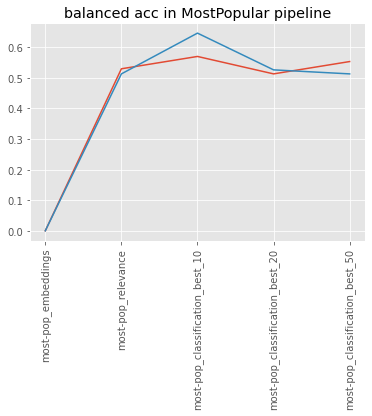

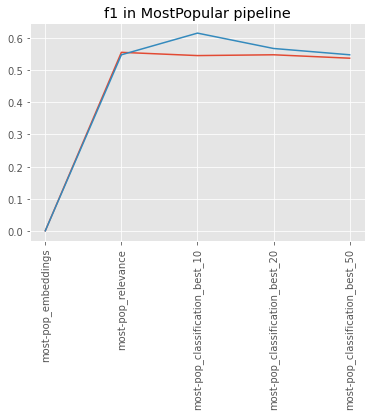

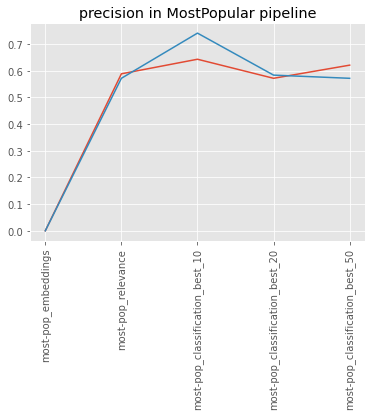

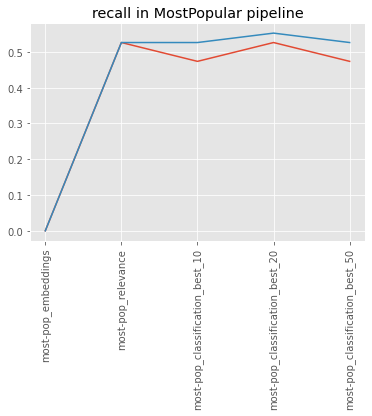

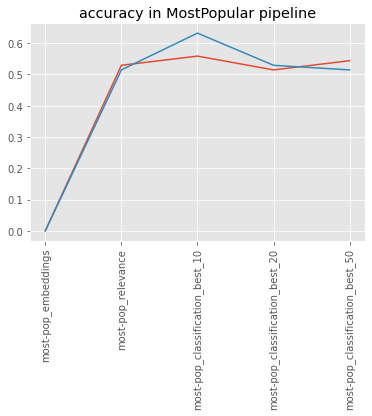

In [9]:
current_experiment = 2
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
most_pop_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
most_pop_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(most_pop_model_performance_random_forest, most_pop_model_performance_logistic_regression, m, 'MostPopular')



* neumf

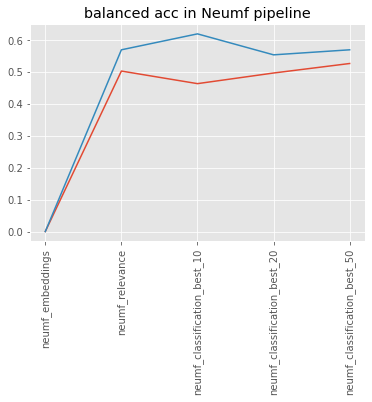

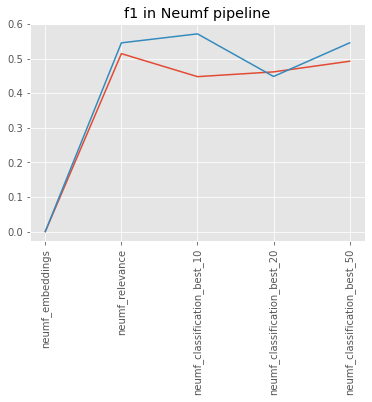

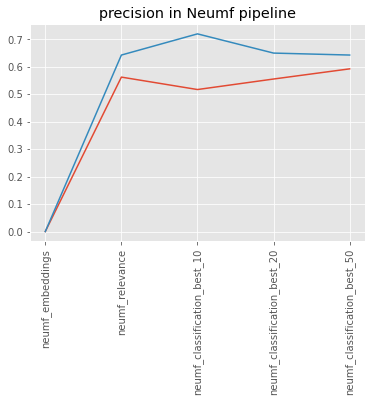

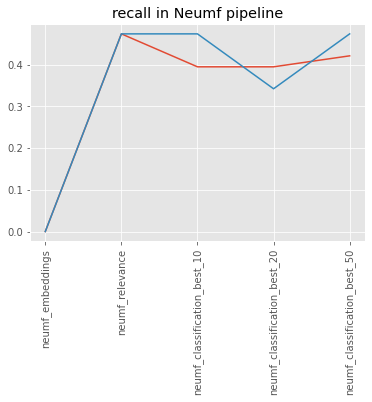

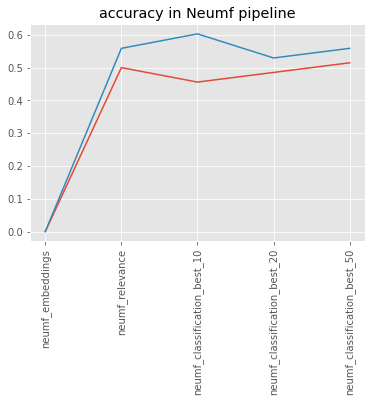

In [10]:
current_experiment = 4
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
neumf_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
neumf_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(neumf_model_performance_random_forest, neumf_model_performance_logistic_regression, m, 'Neumf')

* wrmf

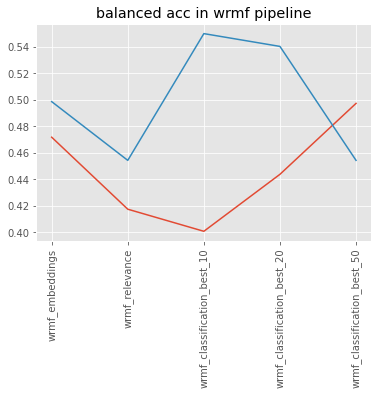

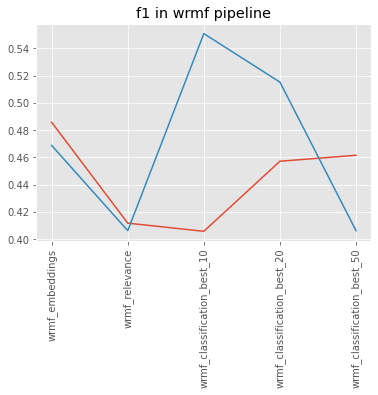

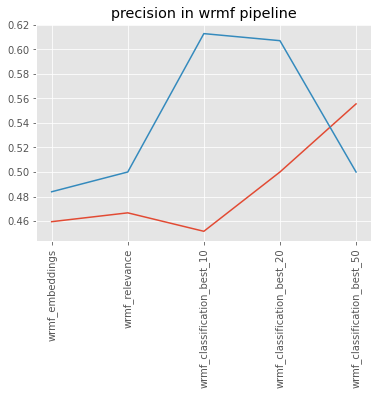

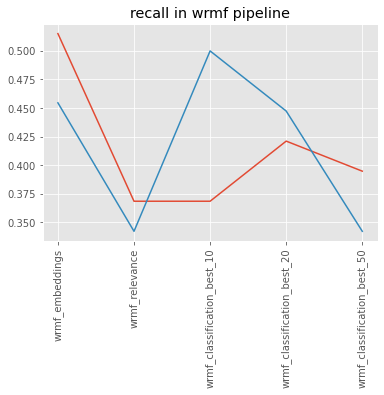

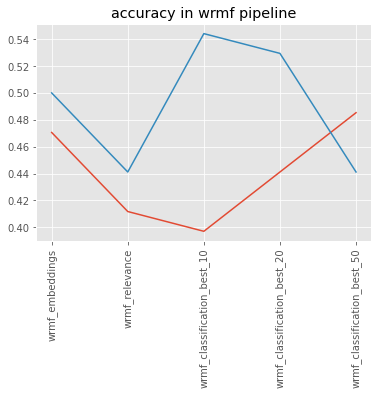

In [11]:
current_experiment = 5
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
wrmf_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
wrmf_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(wrmf_model_performance_random_forest, wrmf_model_performance_logistic_regression, m, 'wrmf')

* light gcn

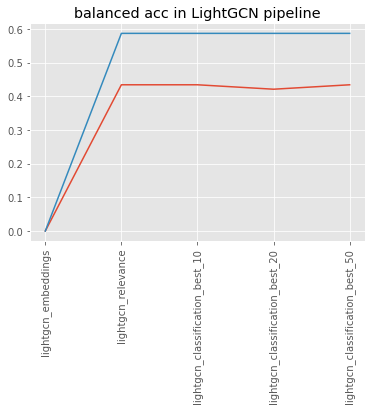

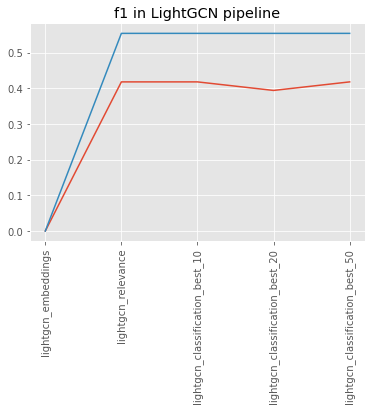

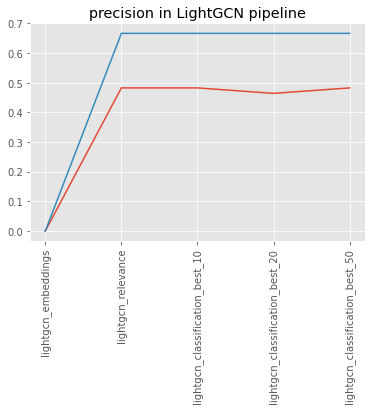

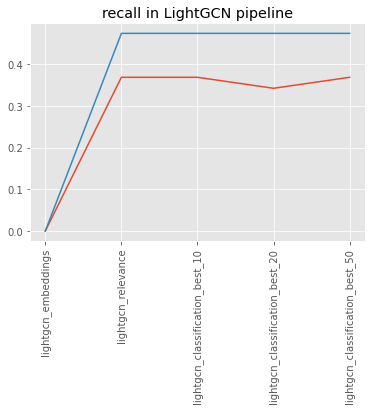

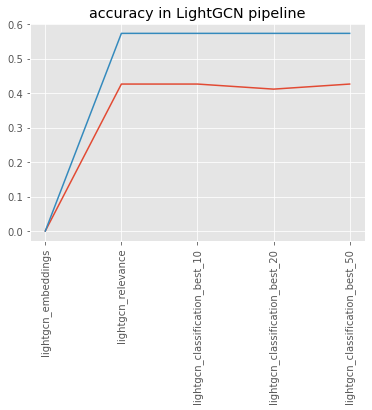

In [12]:
current_experiment = 6
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
lightgcn_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
lightgcn_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(lightgcn_model_performance_random_forest, lightgcn_model_performance_logistic_regression, m, 'LightGCN')

* MultiDAE

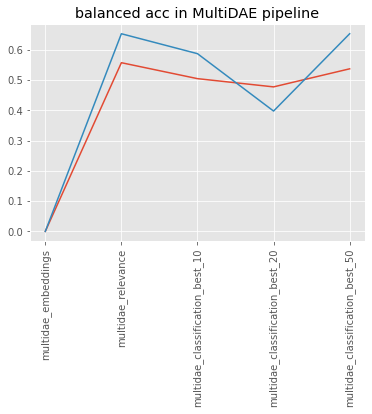

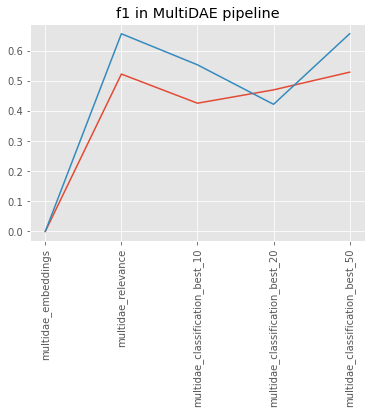

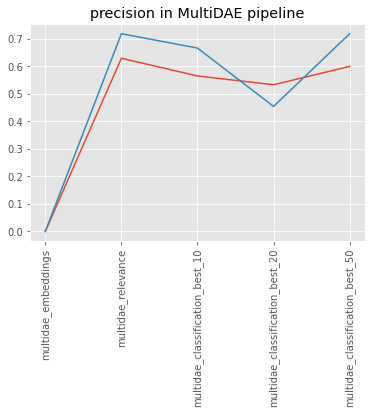

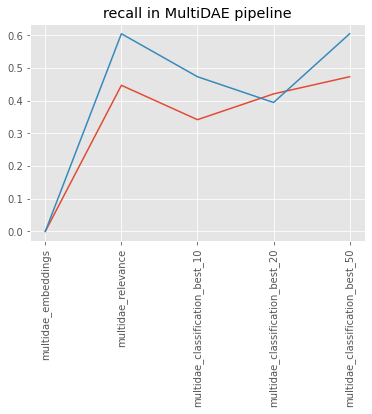

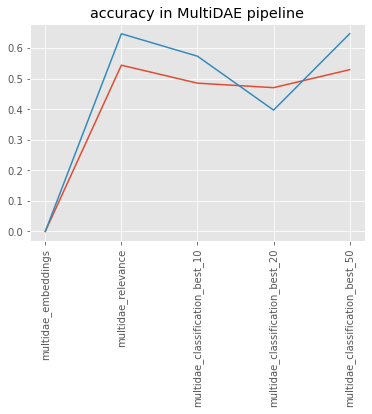

In [13]:
current_experiment = 7
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
multidae_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
multidae_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(multidae_model_performance_random_forest, multidae_model_performance_logistic_regression, m, 'MultiDAE')


##### For each step of the pipeline show performance of recommendation models

* embeddings

<Figure size 432x288 with 0 Axes>

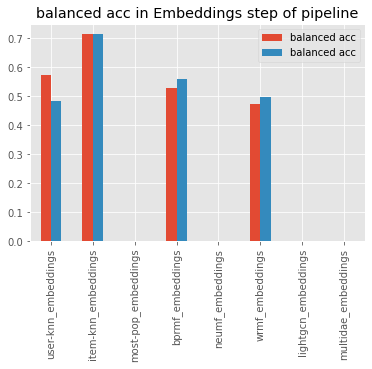

<Figure size 432x288 with 0 Axes>

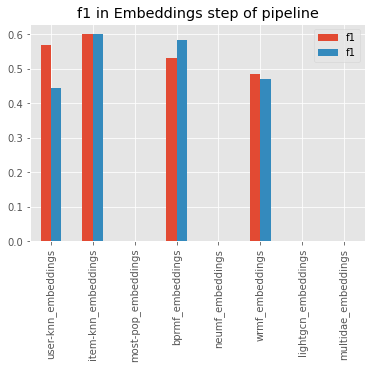

<Figure size 432x288 with 0 Axes>

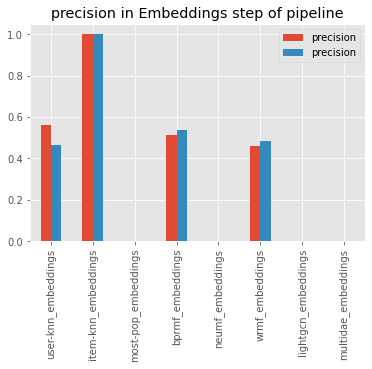

<Figure size 432x288 with 0 Axes>

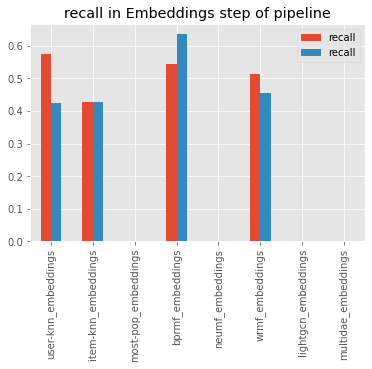

<Figure size 432x288 with 0 Axes>

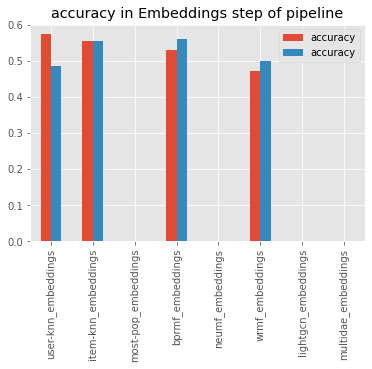

In [14]:
current_step = 0
first_item = 1 + current_step
embeddings_random_forest = gender_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
embeddings_logistic_regression = gender_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(embeddings_random_forest, embeddings_logistic_regression, m, 'Embeddings step of', kind='bar')


* relevance

<Figure size 432x288 with 0 Axes>

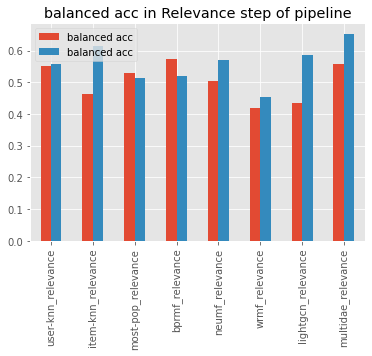

<Figure size 432x288 with 0 Axes>

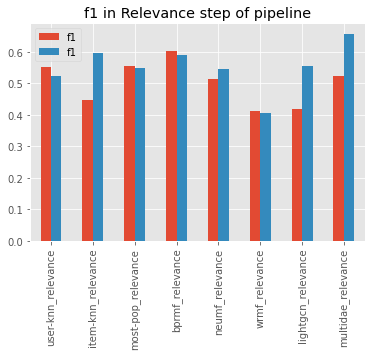

<Figure size 432x288 with 0 Axes>

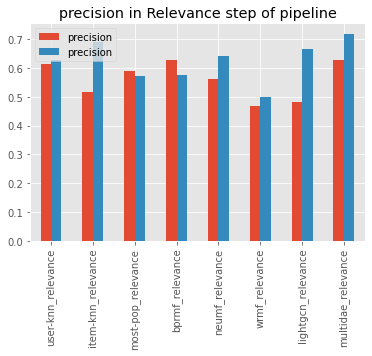

<Figure size 432x288 with 0 Axes>

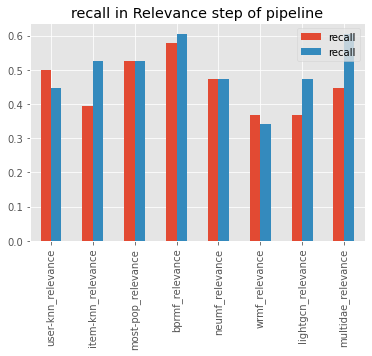

<Figure size 432x288 with 0 Axes>

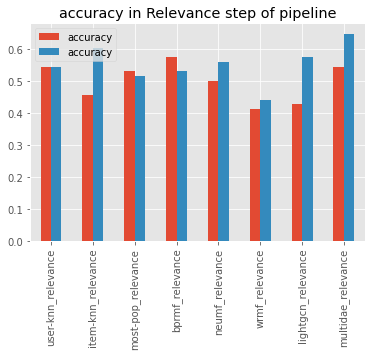

In [15]:
current_step = 1
first_item = 1 + current_step
relevance_random_forest = gender_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
relevance_logistic_regression = gender_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(relevance_random_forest, relevance_logistic_regression, m, 'Relevance step of', kind='bar')

* classification best 10

<Figure size 432x288 with 0 Axes>

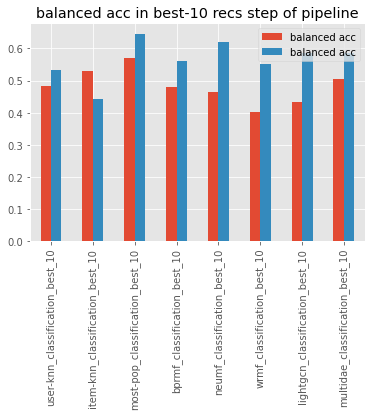

<Figure size 432x288 with 0 Axes>

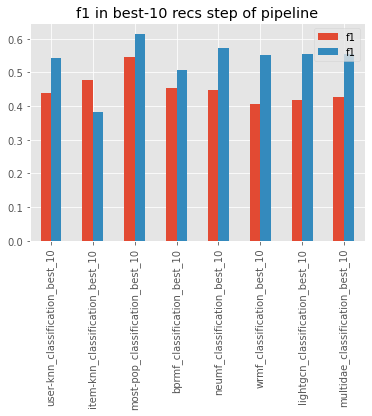

<Figure size 432x288 with 0 Axes>

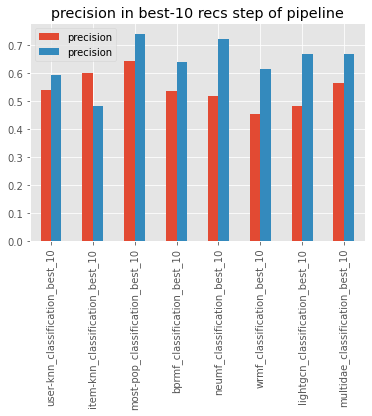

<Figure size 432x288 with 0 Axes>

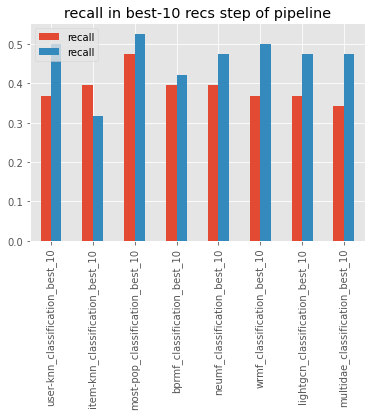

<Figure size 432x288 with 0 Axes>

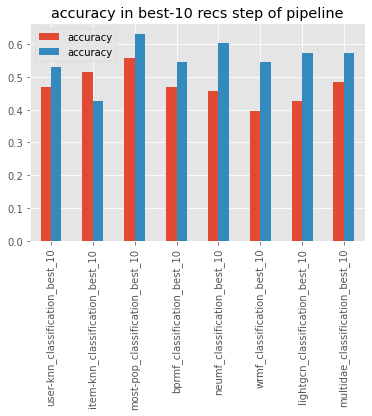

In [16]:
current_step = 2
first_item = 1 + current_step
best10_random_forest = gender_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
best10_logistic_regression = gender_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(best10_random_forest, best10_logistic_regression, m, 'best-10 recs step of', kind='bar')

classification best 20

<Figure size 432x288 with 0 Axes>

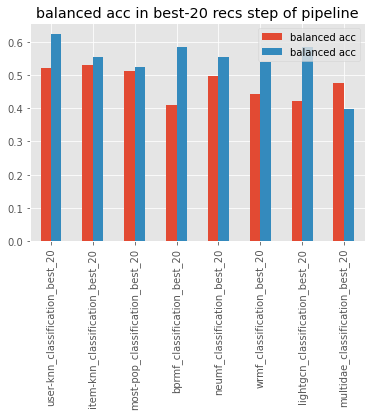

<Figure size 432x288 with 0 Axes>

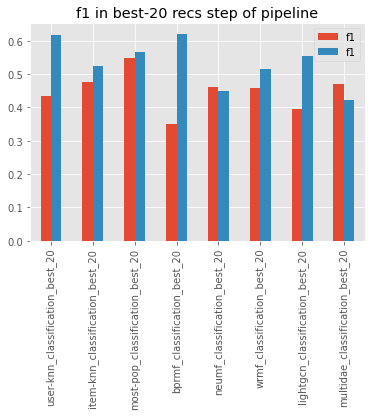

<Figure size 432x288 with 0 Axes>

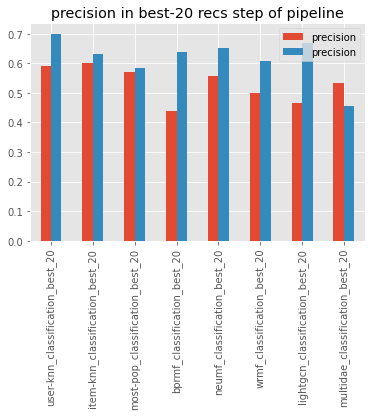

<Figure size 432x288 with 0 Axes>

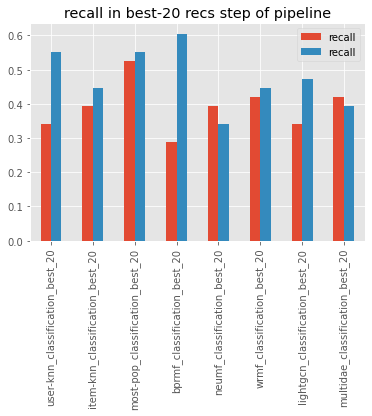

<Figure size 432x288 with 0 Axes>

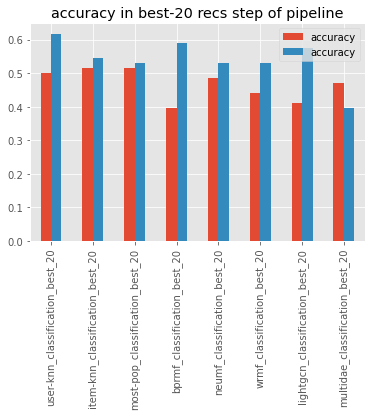

In [17]:
current_step = 3
first_item = 1 + current_step
best20_random_forest = gender_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
best20_logistic_regression = gender_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(best20_random_forest, best20_logistic_regression, m, 'best-20 recs step of', kind='bar')

* classification best 50

<Figure size 432x288 with 0 Axes>

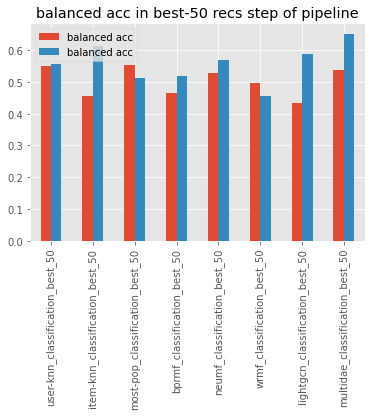

<Figure size 432x288 with 0 Axes>

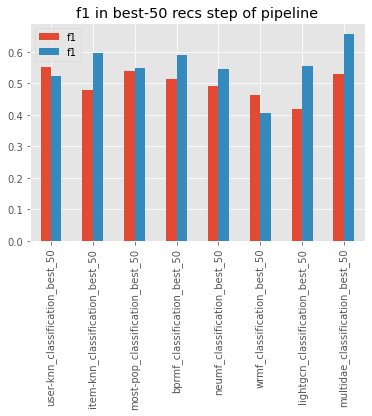

<Figure size 432x288 with 0 Axes>

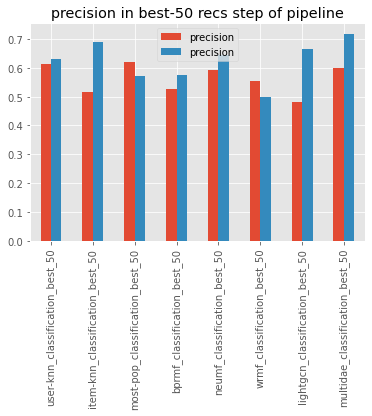

<Figure size 432x288 with 0 Axes>

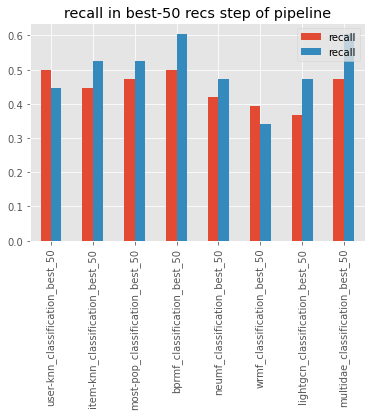

<Figure size 432x288 with 0 Axes>

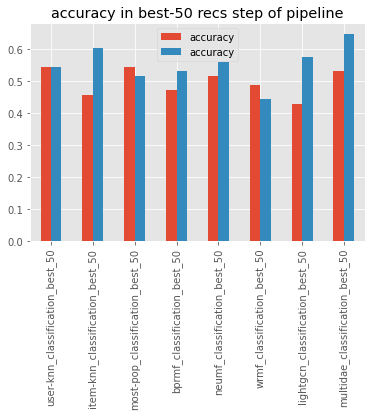

In [18]:

current_step = 4
first_item = 1 + current_step
best50_random_forest = gender_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
best50_logistic_regression = gender_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(best50_random_forest, best50_logistic_regression, m, 'best-50 recs step of', kind='bar')

